## Data Understanding

In [185]:
import pandas as pd
from sklearn.model_selection import train_test_split
from nltk.tokenize import RegexpTokenizer
from nltk import FreqDist
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from sklearn.svm import SVC

In [45]:
fake_or_real_df = pd.read_csv('Data/WELFake_Dataset.csv')

In [46]:
fake_or_real_df_1 = fake_or_real_df[['title', 'text', 'label']]

In [47]:
fake_or_real_df_1.loc[fake_or_real_df_1['label'] == 1, 'label'] = "Real"
fake_or_real_df_1.loc[fake_or_real_df_1['label'] == 0, 'label'] = 1

C:\Users\bento\anaconda3.0\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [48]:
fake_or_real_df_1.loc[fake_or_real_df_1['label'] == "Real", 'label'] = 0

In [49]:
fake_or_real_df_1

,title,text,label
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,0
1,NaN,Did they post their votes for Hillary already?,0
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",0
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,1
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",0
...,...,...,...
72129,Russians steal research on Trump in hack of U....,WASHINGTON (Reuters) - Hackers believed to be ...,1
72130,WATCH: Giuliani Demands That Democrats Apolog...,"You know, because in fantasyland Republicans n...",0
72131,Migrants Refuse To Leave Train At Refugee Camp...,Migrants Refuse To Leave Train At Refugee Camp...,1
72132,Trump tussle gives unpopular Mexican leader mu...,MEXICO CITY (Reuters) - Donald Trump’s combati...,1


In [50]:
fake_df = pd.read_csv('Data/Fake.csv')
true_df = pd.read_csv('Data/True.csv')

In [51]:
fake_df.drop(columns=['subject', 'date'], inplace=True)
true_df.drop(columns=['subject', 'date'], inplace=True)

fake_df['label'] = 1
true_df['label'] = 0

In [52]:
fake_or_real_df_2 = pd.concat([fake_df, true_df])

In [53]:
fake_or_real_df_2

,title,text,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,1
...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,0
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",0
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,0
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,0


In [54]:
fake_or_real_df = pd.concat([fake_or_real_df_1, fake_or_real_df_2])

In [55]:
fake_or_real_df

,title,text,label
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,0
1,NaN,Did they post their votes for Hillary already?,0
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",0
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,1
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",0
...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,0
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",0
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,0
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,0


In [56]:
fake_or_real_df.drop_duplicates(inplace=True)
fake_or_real_df.dropna(inplace=True)

In [57]:
fake_or_real_df.drop(columns=['title'], inplace=True)

In [58]:
fake_or_real_df

,text,label
0,No comment is expected from Barack Obama Membe...,0
2,"Now, most of the demonstrators gathered last ...",0
3,A dozen politically active pastors came here f...,1
4,"The RS-28 Sarmat missile, dubbed Satan 2, will...",0
5,All we can say on this one is it s about time ...,0
...,...,...
21412,BRUSSELS (Reuters) - NATO allies on Tuesday we...,0
21413,"LONDON (Reuters) - LexisNexis, a provider of l...",0
21414,MINSK (Reuters) - In the shadow of disused Sov...,0
21415,MOSCOW (Reuters) - Vatican Secretary of State ...,0


In [59]:
fake_or_real_df.label.value_counts()

1    52699
0    49527
Name: label, dtype: int64

In [60]:
news_cat = pd.read_json('Data/News_Category_Dataset_v3.json', lines=True)

## Data Cleaning

In [61]:
# Transform  data to lowercase
fake_or_real_df['text'] = fake_or_real_df['text'].str.lower()

In [62]:
# Tokenize data
token_pattern = r"(?u)\b\w\w+\b"

tokenizer = RegexpTokenizer(token_pattern)

fake_or_real_df['tokenized'] = fake_or_real_df['text'].apply(tokenizer.tokenize)

In [63]:
fake_or_real_df

,text,label,tokenized
0,no comment is expected from barack obama membe...,0,"[no, comment, is, expected, from, barack, obam..."
2,"now, most of the demonstrators gathered last ...",0,"[now, most, of, the, demonstrators, gathered, ..."
3,a dozen politically active pastors came here f...,1,"[dozen, politically, active, pastors, came, he..."
4,"the rs-28 sarmat missile, dubbed satan 2, will...",0,"[the, rs, 28, sarmat, missile, dubbed, satan, ..."
5,all we can say on this one is it s about time ...,0,"[all, we, can, say, on, this, one, is, it, abo..."
...,...,...,...
21412,brussels (reuters) - nato allies on tuesday we...,0,"[brussels, reuters, nato, allies, on, tuesday,..."
21413,"london (reuters) - lexisnexis, a provider of l...",0,"[london, reuters, lexisnexis, provider, of, le..."
21414,minsk (reuters) - in the shadow of disused sov...,0,"[minsk, reuters, in, the, shadow, of, disused,..."
21415,moscow (reuters) - vatican secretary of state ...,0,"[moscow, reuters, vatican, secretary, of, stat..."


## Data Preparation

In [158]:
X = fake_or_real_df[['text', 'tokenized']]
y = fake_or_real_df['label']

In [159]:
# intial split of data into traiing and test sets with 15% test size
X_train_1, X_test, y_train_1, y_test = train_test_split(X, y, test_size=.15, 
                                                        random_state=42)

In [160]:
# second split of data into training and validation sets with 15% val size
X_train, X_val, y_train, y_val = train_test_split(X_train_1, y_train_1, 
                                                  test_size=0.15,
                                                  random_state=42)

In [161]:
# third split of data into smaller training and val sets
X_train_sub, x1, y_train_sub, y1 = train_test_split(X_train, y_train, 
                                                  test_size=0.8,
                                                  random_state=42)

X_val_sub, x2, y_val_sub, y2 = train_test_split(X_val, y_val, 
                                                test_size=0.8,
                                                random_state=42)

In [162]:
X_train_sub

,text,tokenized
52977,by jerri-lynn scofield \njerri-lynn here: i fi...,"[by, jerri, lynn, scofield, jerri, lynn, here,..."
58730,some senators are more diplomatic about their ...,"[some, senators, are, more, diplomatic, about,..."
6133,a new war toy for the navy was shown off recen...,"[new, war, toy, for, the, navy, was, shown, of..."
20696,abidjan (reuters) - a group of allies of ivory...,"[abidjan, reuters, group, of, allies, of, ivor..."
1994,lima (reuters) - north korea s ambassador to p...,"[lima, reuters, north, korea, ambassador, to, ..."
...,...,...
63279,"des moines, iowa — donald trump is willing to ...","[des, moines, iowa, donald, trump, is, willing..."
69092,,[]
2980,london (reuters) - princes william and harry p...,"[london, reuters, princes, william, and, harry..."
8004,donald trump has been nothing but a disaster s...,"[donald, trump, has, been, nothing, but, disas..."


## Exploratory Data Analysis

In [91]:
def visualize_top_10(freq_dist, title):

    # Extract data for plotting
    top_10 = list(zip(*freq_dist.most_common(10)))
    tokens = top_10[0]
    counts = top_10[1]

    # Set up plot and plot data
    fig, ax = plt.subplots()
    ax.bar(tokens, counts)

    # Customize plot appearance
    ax.set_title(title)
    ax.set_ylabel("Count")
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    ax.tick_params(axis="x", rotation=90)

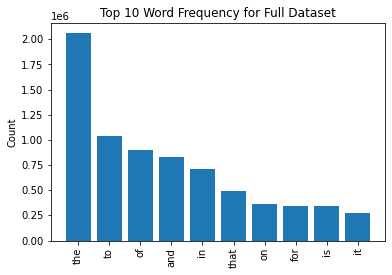

In [51]:
freq_dist = FreqDist(X_train['tokenized'].explode())
visualize_top_10(freq_dist, "Top 10 Word Frequency for Full Dataset")

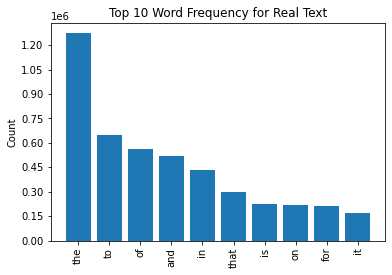

In [182]:
true_freq_dist = FreqDist(fake_or_real_df.loc[fake_or_real_df.label == 0, 'tokenized'].explode())
visualize_top_10(true_freq_dist, "Top 10 Word Frequency for Real Text")

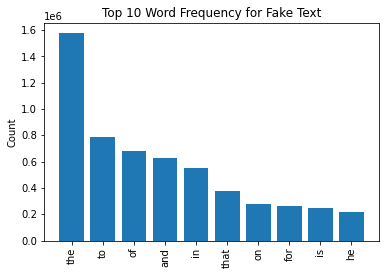

In [181]:
fake_freq_dist = FreqDist(fake_or_real_df.loc[fake_or_real_df.label == 1, 'tokenized'].explode())
visualize_top_10(fake_freq_dist, "Top 10 Word Frequency for Fake Text")

## Baseline Modeling

In [163]:
X_train.reset_index(drop=True, inplace=True)
X_val.reset_index(drop=True, inplace=True)

In [164]:
X_train_sub.reset_index(drop=True, inplace=True)
X_val_sub.reset_index(drop=True, inplace=True)

In [165]:
y_train.reset_index(drop=True, inplace=True)
y_val.reset_index(drop=True, inplace=True)

In [166]:
y_train_sub.reset_index(drop=True, inplace=True)
y_val_sub.reset_index(drop=True, inplace=True)

In [167]:
y_train = y_train.astype(dtype=str)
y_val = y_val.astype(dtype=str)

In [168]:
y_train_sub = y_train_sub.astype(dtype=str)
y_val_sub = y_val_sub.astype(dtype=str)

In [169]:
y_train_sub

0        0
1        1
2        1
3        0
4        1
        ..
14766    1
14767    0
14768    1
14769    0
14770    1
Name: label, Length: 14771, dtype: object

In [72]:
y_train = y_train.to_numpy(dtype="|S6")
y_val = y_val.to_numpy(dtype="|S6")

In [82]:
# Instantiate a vectorizer with max_features=10
# (we are using the default token pattern)
tfidf = TfidfVectorizer(max_features=10)

# Fit the vectorizer on X_train["text"] and transform it
X_train_vectorized = tfidf.fit_transform(X_train["text"])
X_val_vectorized = tfidf.fit_transform(X_val["text"])

# Visually inspect the vectorized data
pd.DataFrame.sparse.from_spmatrix(X_train_vectorized, columns=tfidf.get_feature_names())

C:\Users\bento\anaconda3.0\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,and,for,in,is,it,of,on,that,the,to
0,0.253977,0.277327,0.000000,0.283892,0.000000,0.252312,0.128623,0.270993,0.612035,0.499762
1,0.289246,0.028713,0.276578,0.044088,0.107703,0.182858,0.173117,0.070142,0.735045,0.465678
2,0.299051,0.130618,0.239657,0.133710,0.174984,0.326799,0.030290,0.382904,0.432393,0.588456
3,0.355306,0.096993,0.302535,0.019858,0.020790,0.388273,0.215927,0.113733,0.702098,0.262182
4,0.352455,0.207232,0.353068,0.121222,0.158641,0.350144,0.137304,0.086785,0.679479,0.240072
...,...,...,...,...,...,...,...,...,...,...
73853,0.405718,0.170392,0.156317,0.174425,0.620888,0.341049,0.158053,0.199800,0.300831,0.307057
73854,0.182130,0.137682,0.154378,0.109621,0.016395,0.334035,0.198664,0.224229,0.756253,0.372169
73855,0.305315,0.072928,0.191154,0.085319,0.111656,0.322271,0.048319,0.122164,0.772538,0.356715
73856,0.275467,0.085941,0.256236,0.065982,0.138158,0.410492,0.119577,0.062984,0.720722,0.348460


In [30]:
# We should still have the same number of rows
assert X_train_vectorized.shape[0] == X_train.shape[0]

# The vectorized version should have 10 columns, since we set
# max_features=10
assert X_train_vectorized.shape[1] == 10

In [102]:
# Instantiate a MultinomialNB classifier
baseline_model = MultinomialNB()

# Evaluate the classifier on X_train_vectorized and y_train
baseline_cv = cross_val_score(baseline_model, X_train_vectorized, y_train)
baseline_cv

array([0.51448687, 0.51482535, 0.51489304, 0.5147248 , 0.5146571 ])

In [103]:
# Instantiate a MultinomialNB classifier
baseline_model = MultinomialNB()
baseline_model.fit(X_train_vectorized, y_train)

MultinomialNB()

In [104]:
train_preds = baseline_model.predict(X_train_vectorized)
val_preds = baseline_model.predict(X_val_vectorized)
print("val acc: ", accuracy_score(y_val, val_preds))
print("train acc: ", accuracy_score(y_train, train_preds))

val acc:  0.5123523093447906
train acc:  0.5147174307454846


Baseline model no better than random chance

## Model 2

### Stop Words

In [105]:
nltk.download('stopwords', quiet=True)

stopwords_list = stopwords.words('english')
stopwords_list[:20]

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his']

In [179]:
def remove_stopwords(token_list):
    """
    Given a list of tokens, return a list where the tokens
    that are also present in stopwords_list have been
    removed
    """
    stopwords_removed = [token for token in token_list if token not in stopwords_list]
    return stopwords_removed

In [180]:
X_train["text_without_stopwords"] = X_train["tokenized"].apply(remove_stopwords)

In [177]:
X_train["label"] = [y_train[val] for val in X_train.index]

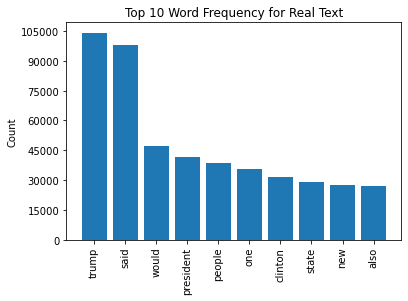

In [125]:
true_freq_dist = FreqDist(X_train.loc[X_train.label == '0', 'text_without_stopwords'].explode())
visualize_top_10(true_freq_dist, "Top 10 Word Frequency for Real Text")

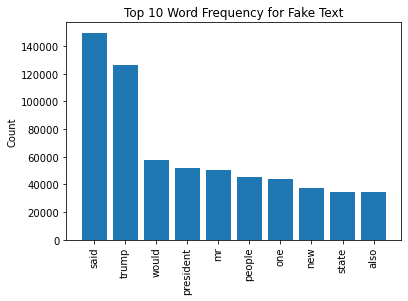

In [126]:
fake_freq_dist = FreqDist(X_train.loc[X_train.label == '1', 'text_without_stopwords'].explode())
visualize_top_10(fake_freq_dist, "Top 10 Word Frequency for Fake Text")

In [128]:
# Instantiate the vectorizer
tfidf = TfidfVectorizer(
    max_features=10,
    stop_words=stopwords_list
)

# Fit the vectorizer on X_train["text"] and transform it
X_train_vectorized = tfidf.fit_transform(X_train["text"])
X_val_vectorized = tfidf.fit_transform(X_val["text"])
# Visually inspect the vectorized data
pd.DataFrame.sparse.from_spmatrix(X_train_vectorized, columns=tfidf.get_feature_names())

C:\Users\bento\anaconda3.0\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,also,clinton,new,one,people,president,said,state,trump,would
0,0.226247,0.0,0.000000,0.000000,0.225396,0.423614,0.332055,0.000000,0.661823,0.412663
1,0.417260,0.0,0.090266,0.079908,0.000000,0.078126,0.673640,0.587941,0.000000,0.076106
2,0.000000,0.0,0.841921,0.000000,0.443109,0.000000,0.163198,0.261133,0.000000,0.000000
3,0.119785,0.0,0.000000,0.573486,0.477337,0.224280,0.615316,0.000000,0.000000,0.000000
4,0.253333,0.0,0.274018,0.000000,0.252380,0.000000,0.743618,0.000000,0.494038,0.000000
...,...,...,...,...,...,...,...,...,...,...
73853,0.000000,0.0,0.079394,0.070284,0.146250,0.274866,0.161593,0.000000,0.930432,0.000000
73854,0.133189,0.0,0.432191,0.000000,0.132688,0.124688,0.781909,0.156392,0.259738,0.242930
73855,0.171799,0.0,0.000000,0.246753,0.085576,0.000000,0.693395,0.605183,0.000000,0.235014
73856,0.000000,0.0,0.000000,0.241476,0.251239,0.000000,0.740255,0.000000,0.000000,0.574971


In [129]:
# Instantiate a MultinomialNB classifier
stopwords_removed_model = MultinomialNB()
stopwords_removed_model.fit(X_train_vectorized, y_train)

MultinomialNB()

In [130]:
stopwords_train_preds = stopwords_removed_model.predict(X_train_vectorized)
stopwords_val_preds = stopwords_removed_model.predict(X_val_vectorized)
print("val acc: ", accuracy_score(y_val, stopwords_val_preds))
print("train acc: ", accuracy_score(y_train, stopwords_train_preds))

val acc:  0.5266226791468467
train acc:  0.528690189282136


Minimal improvement

## Model 3: Stemming and Tokenization

In [135]:
stemmer = SnowballStemmer(language="english")

def stem_and_tokenize(document):
    tokens = tokenizer.tokenize(document)
    return [stemmer.stem(token) for token in tokens]

In [140]:
stemmed_stopwords = [stemmer.stem(word) for word in stopwords_list]

In [141]:
# Instantiate the vectorizer
tfidf = TfidfVectorizer(
    max_features=10,
    stop_words=stemmed_stopwords,
    tokenizer=stem_and_tokenize
)

# Fit the vectorizer on X_train["text"] and transform it
X_train_vectorized = tfidf.fit_transform(X_train["text"])
X_val_vectorized = tfidf.fit_transform(X_val["text"])

# Visually inspect the vectorized data
pd.DataFrame.sparse.from_spmatrix(X_train_vectorized, columns=tfidf.get_feature_names())

C:\Users\bento\anaconda3.0\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,one,peopl,presid,republican,said,say,state,trump,would,year
0,0.000000,0.225937,0.417352,0.000000,0.333393,0.227472,0.000000,0.663483,0.414325,0.000000
1,0.082695,0.000000,0.160330,0.000000,0.704420,0.087386,0.654000,0.000000,0.079584,0.171939
2,0.000000,0.628447,0.000000,0.389500,0.231835,0.158179,0.591912,0.000000,0.000000,0.155616
3,0.551530,0.463105,0.213863,0.000000,0.597940,0.116563,0.109046,0.000000,0.000000,0.229348
4,0.000000,0.161455,0.000000,0.000000,0.476486,0.487655,0.000000,0.316084,0.000000,0.639669
...,...,...,...,...,...,...,...,...,...,...
73853,0.065343,0.137168,0.253377,0.000000,0.151804,0.345250,0.064597,0.872746,0.000000,0.067931
73854,0.000000,0.064258,0.059349,0.876172,0.379277,0.000000,0.121045,0.125800,0.117837,0.190939
73855,0.231510,0.080997,0.000000,0.100401,0.657357,0.244642,0.534018,0.000000,0.222800,0.320903
73856,0.237321,0.249090,0.000000,0.000000,0.735117,0.000000,0.000000,0.000000,0.570980,0.123359


In [142]:
# Instantiate a MultinomialNB classifier
stem_and_tokenize_model = MultinomialNB()
stem_and_tokenize_model.fit(X_train_vectorized, y_train)

MultinomialNB()

In [143]:
stem_and_tokenize_train_preds = stem_and_tokenize_model.predict(X_train_vectorized)
stem_and_tokenize_val_preds = stem_and_tokenize_model.predict(X_val_vectorized)
print("val acc: ", accuracy_score(y_val, stem_and_tokenize_val_preds))
print("train acc: ", accuracy_score(y_train, stem_and_tokenize_train_preds))

val acc:  0.5234003375786405
train acc:  0.5303961656150993


### Model: Max Features

In [170]:
# Instantiate the vectorizer
tfidf = TfidfVectorizer(
    max_features=200,
    stop_words=stemmed_stopwords,
    tokenizer=stem_and_tokenize
)

# Fit the vectorizer on X_train["text"] and transform it
X_train_vectorized = tfidf.fit_transform(X_train_sub["text"])
X_val_vectorized = tfidf.fit_transform(X_val_sub["text"])


# Create a full df of vectorized + engineered features
X_train_vectorized_df = pd.DataFrame(X_train_vectorized.toarray(), columns=tfidf.get_feature_names())

C:\Users\bento\anaconda3.0\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [172]:
X_train_vectorized_df

,000,2016,accord,act,ad,administr,allow,also,america,american,...,week,well,white,win,women,work,world,would,year,york
0,0.000000,0.04096,0.071841,0.000000,0.000000,0.000000,0.0,0.042094,0.053069,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.033068,0.231253,0.145065,0.183956,0.00000
1,0.000000,0.00000,0.000000,0.053481,0.000000,0.000000,0.0,0.000000,0.032787,0.024942,...,0.045235,0.078044,0.000000,0.000000,0.000000,0.081721,0.000000,0.194186,0.016236,0.00000
2,0.077184,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.048473,0.000000,...,0.000000,0.000000,0.000000,0.081303,0.000000,0.060408,0.000000,0.088334,0.192027,0.00000
3,0.087753,0.00000,0.074604,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.218324,0.00000
4,0.000000,0.00000,0.000000,0.000000,0.066370,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.196613,0.041112,0.000000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14766,0.000000,0.00000,0.000000,0.000000,0.067572,0.000000,0.0,0.000000,0.091873,0.000000,...,0.000000,0.145790,0.061830,0.077048,0.253955,0.000000,0.000000,0.083712,0.045495,0.07604
14767,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
14768,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.075317,0.000000,...,0.000000,0.000000,0.202753,0.000000,0.138794,0.000000,0.109400,0.000000,0.149185,0.00000
14769,0.000000,0.00000,0.000000,0.000000,0.000000,0.047664,0.0,0.000000,0.062760,0.095485,...,0.043293,0.000000,0.042238,0.052633,0.000000,0.039107,0.000000,0.085778,0.031078,0.00000


In [188]:
max_features_model = MultinomialNB()
max_features_model.fit(X_train_vectorized, y_train_sub)

MultinomialNB()

In [189]:
max_features_model_train_preds = max_features_model.predict(X_train_vectorized)
max_features_model_val_preds = max_features_model.predict(X_val_vectorized)
print("val acc: ", accuracy_score(y_val_sub, max_features_model_val_preds))
print("train acc: ", accuracy_score(y_train_sub, max_features_model_train_preds))

val acc:  0.5410590943975442
train acc:  0.5767382032360707


In [186]:
 clf = SVC(kernel='linear').fit(X_train_vectorized, y_train_sub)

In [187]:
max_features_model_train_preds = clf.predict(X_train_vectorized)
max_features_model_val_preds = clf.predict(X_val_vectorized)
print("val acc: ", accuracy_score(y_val_sub, max_features_model_val_preds))
print("train acc: ", accuracy_score(y_train_sub, max_features_model_train_preds))

val acc:  0.522256331542594
train acc:  0.6032766908130797


## Final Evaluation

## Conclusion

## Next Steps